# Analyzing MD performance

This jupyter notebook is used to gather performance data from GROMACS log files.

In [1]:
from perfstats import PerformanceStats
import matplotlib.pyplot as plt

In [2]:
HOME = ! pwd
HOME = HOME[0]
HOME

'/disk/AAMD/AAMD-tests'

In [3]:
! ls

anatase-101-POPE-50k		     Kebnekaise
anatase-NP-POPE-300k		     MD-performance.ipynb
Beskow-12nodes-anatase-101-POPE-50k  perfstats.py
Beskow-12nodes-anatase-NP-POPE-300k  __pycache__
Dardel				     Tetralith-12nodes-anatase-101-POPE-50k
dardel-gmx-1n.run		     Tetralith-12nodes-anatase-NP-POPE-300k
gmx-large.pdf			     Tetralith-4nodes-anatase-101-POPE-50k
gmx-small.pdf


# CPU benchmarks:

In [19]:
dardel_small = PerformanceStats(HOME + '/Dardel/small-system/')
beskow_small = PerformanceStats(HOME + '/Beskow-12nodes-anatase-101-POPE-50k/')
tetralith_small = PerformanceStats(HOME + '/Tetralith-12nodes-anatase-101-POPE-50k/')
keb_skylake_small = PerformanceStats(HOME + '/Kebnekaise/anatase-101-POPE-50k-Skylake/')
keb_broadwell_small = PerformanceStats(HOME + '/Kebnekaise/anatase-101-POPE-50k-Broadwell/')

Benchmarks from Dardel, Beskow and Tetralith are run with 1 OpenMP thread:

In [20]:
dardel_small.ncpus, dardel_small.performance

([128, 256, 384], [71.66, 124.25, 166.278])

In [21]:
beskow_small.ncpus, beskow_small.performance

([32, 64, 128, 256, 384], [12.971, 26.34, 48.613, 48.858, 56.153])

In [22]:
tetralith_small.ncpus, tetralith_small.performance

([32, 64, 128, 256, 384], [16.644, 34.442, 62.98, 86.286, 103.584])

In Kebnekaise CPU runs, I used both 1 and 2 OpenMP threads, so I need to subdivide the stats first:

In [23]:
keb_skylake_small.subdivideomp()

Subdividing the stats into 2 sets...


In [30]:
keb_broadwell_small.subdivideomp()

Subdividing the stats into 2 sets...


In [32]:
keb_skylake_small.nthreads

[[1, 1, 1, 1, 1], [2, 2, 2, 2]]

In [33]:
keb_skylake_small.ncpus[0], keb_skylake_small.performance[0]

([28, 56, 112, 224, 336], [21.485, 38.489, 73.224, 111.278, 142.422])

In [34]:
keb_skylake_small.ncpus[1], keb_skylake_small.performance[1]

([56, 112, 224, 336], [37.835, 66.857, 120.753, 140.301])

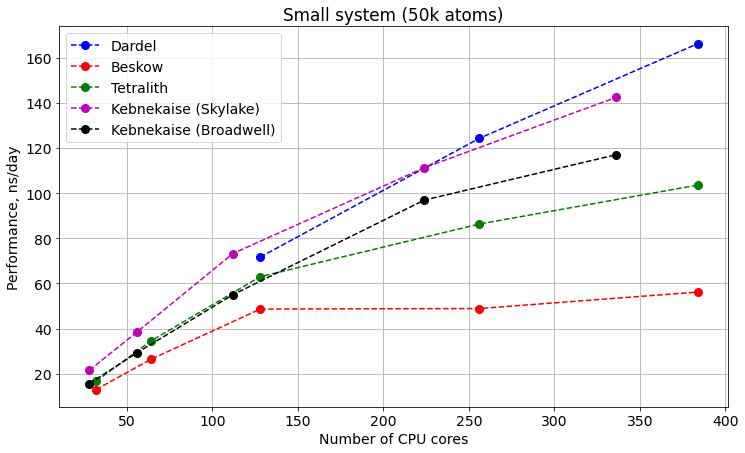

In [35]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12,7))
plt.grid()

plt.xlabel("Number of CPU cores")
plt.ylabel("Performance, ns/day")
plt.plot(dardel_small.ncpus, dardel_small.performance, 'bo--', markersize=8, label='Dardel')
plt.plot(beskow_small.ncpus, beskow_small.performance, 'ro--', markersize=8, label='Beskow')
plt.plot(tetralith_small.ncpus, tetralith_small.performance, 'go--', markersize=8, label='Tetralith')
plt.plot(keb_skylake_small.ncpus[0], keb_skylake_small.performance[0], 'mo--', markersize=8, label='Kebnekaise (Skylake)')
plt.plot(keb_broadwell_small.ncpus[0], keb_broadwell_small.performance[0], 'ko--', markersize=8, label='Kebnekaise (Broadwell)')
plt.legend(loc="upper left")
plt.title('Small system (50k atoms)')
plt.savefig('gmx-cpu-small.pdf')
plt.show()

In [36]:
dardel_large = PerformanceStats(HOME + '/Dardel/large-system/')
beskow_large = PerformanceStats(HOME + '/Beskow-12nodes-anatase-NP-POPE-300k/')
tetralith_large = PerformanceStats(HOME + '/Tetralith-12nodes-anatase-NP-POPE-300k/')
keb_skylake_large = PerformanceStats(HOME + '/Kebnekaise/anatase-NP-POPE-300k-Skylake/')
keb_broadwell_large = PerformanceStats(HOME + '/Kebnekaise/anatase-NP-POPE-300k-Broadwell/')

In [37]:
keb_skylake_large.subdivideomp()

Subdividing the stats into 2 sets...


In [38]:
keb_broadwell_large.subdivideomp()

Subdividing the stats into 2 sets...


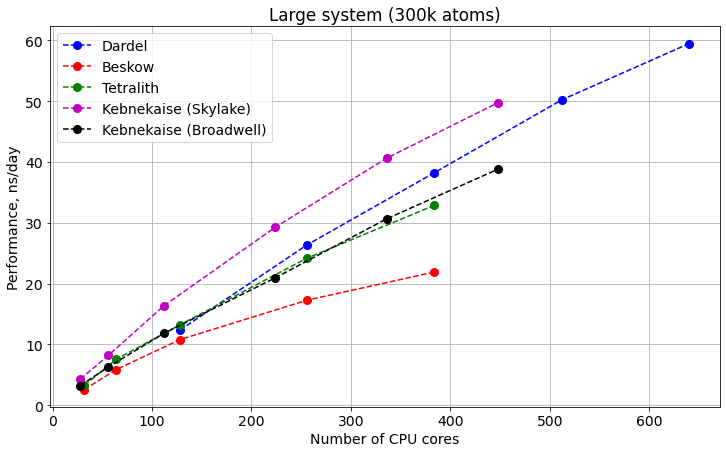

In [39]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12,7))
plt.grid()

plt.xlabel("Number of CPU cores")
plt.ylabel("Performance, ns/day")
plt.plot(dardel_large.ncpus, dardel_large.performance, 'bo--', markersize=8, label='Dardel')
plt.plot(beskow_large.ncpus, beskow_large.performance, 'ro--', markersize=8, label='Beskow')
plt.plot(tetralith_large.ncpus, tetralith_large.performance, 'go--', markersize=8, label='Tetralith')
plt.plot(keb_skylake_large.ncpus[0], keb_skylake_large.performance[0], 'mo--', markersize=8, label='Kebnekaise (Skylake)')
plt.plot(keb_broadwell_large.ncpus[0], keb_broadwell_large.performance[0], 'ko--', markersize=8, label='Kebnekaise (Broadwell)')
plt.legend(loc="upper left")
plt.title('Large system (300k atoms)')
plt.savefig('gmx-cpu-large.pdf')
plt.show()